# Lab 5 Force Control

## Questions

### Question 5.1: Simulate P control

**Is the proposed controller correct? Why?**

1. ¿Es correcto el controlador propuesto?

Observando la gráfica de la fuerza de contacto $f_e$, podemos ver que la fuerza en el
eje X (línea amarilla) no converge a la fuerza deseada de 10 N. En su lugar, después
de unas oscilaciones iniciales, se estabiliza en un valor negativo, aproximadamente
alrededor de -13 N. Esto indica un error significativo en la dirección opuesta a la deseada en estado estacionario . La línea azul para el eje Y de la fuerza se mantiene en
cero, que es la fuerza deseada en ese eje.

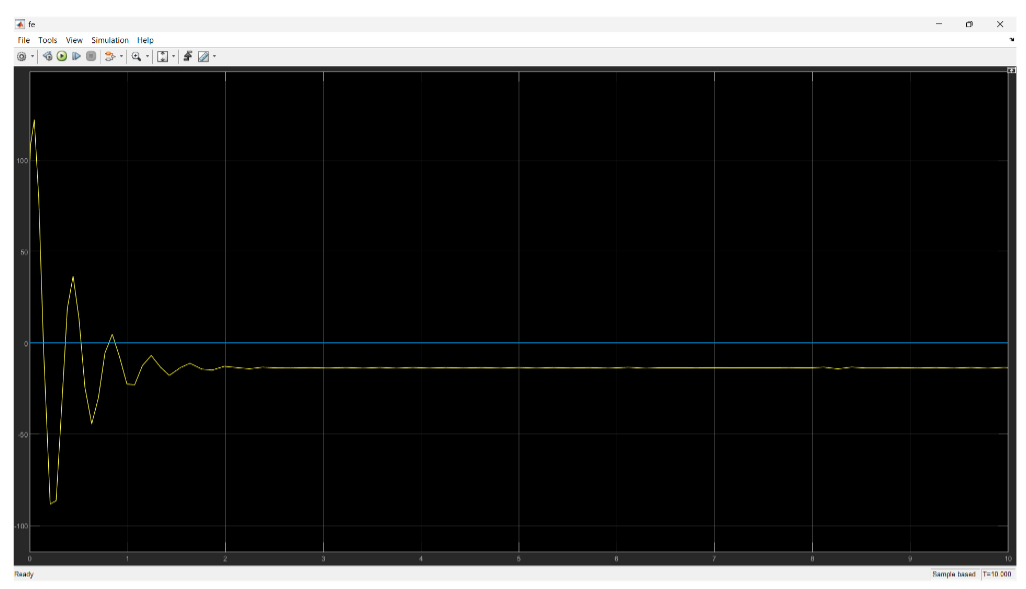


Por lo tanto, el controlador implementado, en su configuración actual de control
Proporcional (P), no es correcto para el propósito de alcanzar la fuerza deseada de
[10, 0] N.

2. ¿Por qué no es correcto?

El esquema de control que estamos utilizando es el siguiente:

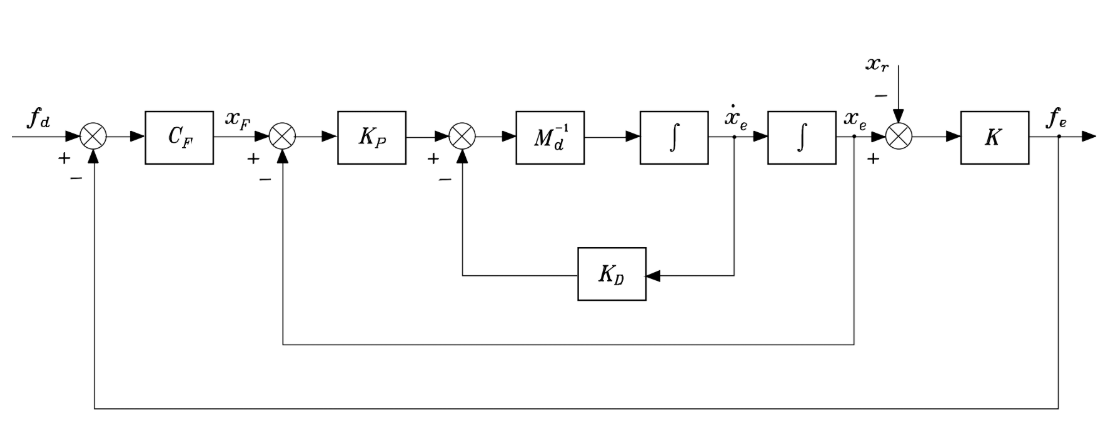

donde:

$$x_F = C_F(f_d - f_e) \tag {5.4}$$

$$\dot x_e = K_P \cdot x_F - K_D$$

Un controlador proporcional como el que estamos usando reduce el error, pero no
logra eliminarlo por completo dejando un valor distinto de cero en estado estacionario.


Esto es especialmente cierto cuando hay perturbaciones constantes o un offset en el
sistema, o cuando la ganancia proporcional no es suficiente para contrarrestar las
dinámicas internas o las fuerzas del entorno. 

En este caso, la fuerza se asienta en un
valor muy alejado del objetivo, lo que sugiere una falta de acción integral: El control P por sí solo no garantiza la eliminación del error en estado estacionario para sistemas con perturbaciones constantes o una referencia no nula. La presencia de la fuerza de contacto del entorno y la dinámica del propio robot actúan como perturbaciones que el controlador P no puede compensar completamente, resultando en ese offset constante (esta es la mejora que implementaremos en el siguiente apartado).


**What is happening in the Y axis? Why?**

En el eje Y, la fuerza de contacto ejercida $f_e(2)$ (línea azul en la figura anterior) se mantiene en 0 N durante toda la simulación. Esto es exactamente lo que esperamos y es un comportamiento correcto para este eje, dado el enunciado. 

Las razones son las siguientes:

- Fuerza deseada nula: La fuerza deseada $f_d$ para el eje Y es 0 N (ya que fd=[10,0] N).
    
- Ganancia nula en CF para el eje Y: La matriz CF = [0.05 0; 0 0] tiene un cero en la posición (2,2), lo que significa que el controlador no aplica ninguna acción de control basada en la fuerza de contacto para el eje Y a través de este término CF. Si no hay un error de fuerza en Y (porque fd=0 y el robot está en una posición donde fe=0), el controlador no intenta cambiar la fuerza en esa dirección.

- Ausencia de interacción/perturbaciones en Y: Si el entorno no ejerce fuerzas en Y (la "pared" solo interactúa en X, y $x_e$ tiene el mismo componente Y que la $x_r$ de referencia, y no hay otras perturbaciones o fuerzas externas modeladas en el eje Y, entonces la fuerza en ese eje permanecerá en cero.

## Question 5.2: Simulate PI control

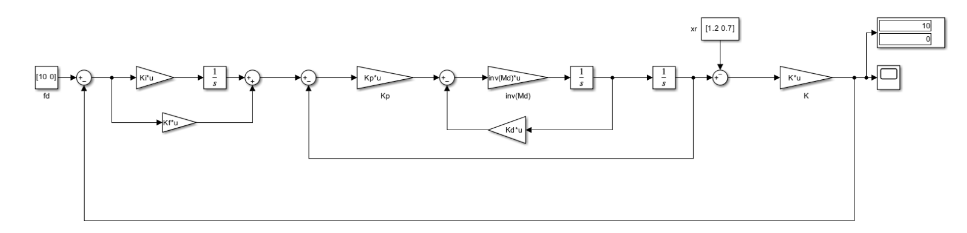


**Does this produce any improvement in the controller? Why?**

Sí, como se observa en la figura, la implementación del control PI (Proporcional-Integral) con la modificación de CF = KF +KI·∫(⋅)dξ definitivamente produce una mejora significativa en el controlador de fuerza, especialmente en su capacidad para alcanzar la fuerza
deseada de manera precisa.

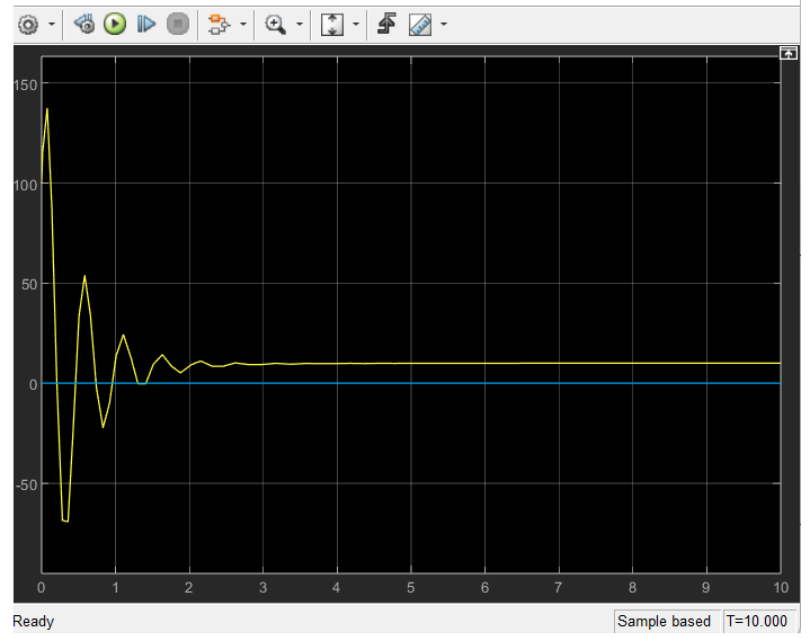

¿Por qué?

- Eliminación del Error en Estado Estacionario: La principal ventaja de añadir
el término integral (KI·∫(⋅)dξ) es su capacidad para eliminar el error en estado
estacionario. Con el control P anterior, observamos que la fuerza en el eje X
se estabilizaba en un valor muy diferente al deseado (aproximadamente -13 N
en lugar de 10 N). La acción integral acumula este error persistente a lo largo
del tiempo. Mientras exista una diferencia entre la fuerza deseada y la fuerza
real, el integrador seguirá actuando, "empujando" la salida del controlador
hasta que el error sea cero. Esto permite que el robot aplique exactamente la
fuerza deseada en el eje X (10 N).

- Mayor Precisión: Al eliminar el error en estado estacionario, el control PI
permite una mayor precisión en la aplicación de la fuerza.

- Compensación de Perturbaciones: Como el enunciado lo menciona, el control PI ayuda a "abordar las perturbaciones introducidas por $x_F$". El término integral puede compensar efectos que un simple control P no podría, asegurando que, a largo plazo, la fuerza real converja a la referencia a pesar de estas influencias.

Es por ello por lo que la mejora concluye en la capacidad del controlador PI para lograr
el objetivo fundamental del control de fuerza: alcanzar y mantener la fuerza deseada
sin un error persistente, algo que el control P no podía garantizar por sí solo.



**Can you improve it more? How?**

Sí, es muy probable que el controlador pueda mejorarse aún más. Las formas de
hacerlo dependerán de los nuevos resultados (si el PI introduce oscilaciones o sigue
siendo lento) y de los requisitos específicos del sistema. Algunas opciones comunes
incluyen:

- Ajuste Fino de Ganancias (KF y KI): Aunque las ganancias proporcionadas
(KF = [0.03 0; 0 0] y KI = [0.03 0; 0 0]) son un punto de partida, podrían no ser las
óptimas. Un ajuste manual o mediante métodos de sintonización (como Ziegler-
Nichols, o métodos basados en optimización) podría reducir el tiempo de
establecimiento, minimizar el sobreimpulso (overshoot) si lo hubiera, y mejorar
la respuesta transitoria general de la fuerza. Si el sistema oscila demasiado con
el PI actual, se podría reducir KI. Si es muy lento, se podría aumentar.
- Incorporar un término derivativo (Control PID): Si el sistema muestra
oscilaciones persistentes o una respuesta muy lenta para alcanzarlas con el PI,
añadir un término derivativo (D) convertiría el controlador en un PID
(Proporcional-Integral-Derivativo). Un término derivativo reacciona a la tasa de
cambio del error.
    - ¿Cómo se implementaría? Se añadiría una rama más a la acción de
CF: $CF = KF  + KI ∫(⋅)dξ + KD ·d(⋅)/dt$. El término $KD·d(⋅)/dt$ implicaría un
bloque Derivative seguido de un Gain (KD) en paralelo con las ramas P
e I, y se sumaría a las salidas de KF y KI.
    -  Beneficios: El término D puede ayudar a amortiguar las oscilaciones,
mejorar la estabilidad y reducir el tiempo de respuesta, ya que predice
el error futuro basándose en su tasa de cambio.
- Compensación de avance (Feedforward): Si se conoce el modelo dinámico
del robot o del entorno con más precisión, se podría implementar una
compensación feedforward. Esto significa que, además de la señal de control
generada por el lazo de retroalimentación (PI), se añadiría una señal de control
calculada directamente a partir de la fuerza deseada y el modelo del sistema.
Esto puede acelerar la respuesta y reducir el error, ya que el controlador
"anticipa"; lo que se necesita en lugar de solo reaccionar al error.
- Controladores más Avanzados: Para sistemas más complejos o requisitos de
rendimiento muy específicos, se podrían considerar otros tipos de
controladores, como el control por impedancia (que permite que el robot se
adapte a la rigidez del entorno), control adaptativo (que ajusta las ganancias
automáticamente), o control predictivo (MPC). Sin embargo, esto va más allá
de un controlador PI básico.

## Introduction

In this lab we will simulate the dynamic behavior of the RR manipulator under a force control shceme with an internal position loop. As in the previous situation, the robot's dynamic behavior is linearized through the control law we used in the previous Labs

In this case, the goal is to implement the force control law indicated illustrated in the following schema according to the expression:

$$M_d \ddot x_e + K_D \dot x_e + K_P(I_3 + C_F K)x_e = K_P+C_F(Kx_r + f_d)$$

## Simulate P control

Simulate in SIMULINK the dynamic behavior of the manipulator in contact with the environment using the equivalent model, assuming the contact position is

- $x_r = [1.2, 0.7]$ (m)
- $f_d = [10, 0]$ (N)

## Simulate PI control

With the proposed control scheme, due to disturbances introduced by $x_r$, 
the reference force may not be reached in steady state. To address this, it is proposed to convert the constant CF into a proportional-integral action:

$$C_F = K_F + K_i \int ^t (·) dx $$

Implement this model in SIMULINK and simulate the dynamic behavior when

- $K_F = [0.03 0; 0 0]$
- $K_I = [0.03 0, 0 0]$]